# Procesamiento Digital de Imagenes/ Cesar Germán Castellanos 
# Yessica Alejandra Gomez Rivera 

# Morphological processing



*   We use **mathematical morphology** as a means to identify and extract **meaningful image descriptors**
based on properties of form or shape within the image.
*   Key areas of application are **segmentation** together with **automated counting** and **inspection**.
* Morphological operations can be applied to images of all types, but the primary is for processing *binary images* and the key morphological operators are the *dilation* and *erosion*.
* More sophisticated morphological procedures.



## Some concepts



1.   **Image foreground pixels:** the pixels in a binary image having logical value **1**. 
2.   **Image background pixels:** those pixels having logical value **0**. 
3. An *object* in a binary image consists of any group of *connected pixels*.



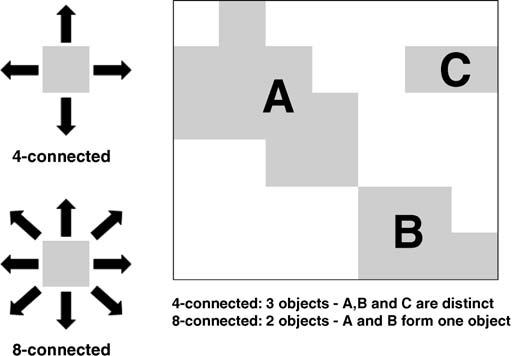



*   Binary images have no textural (i.e. grey-scale or colour) content; thus, the only properties of interest in binary images are the **shape**, **size** and **location** of the *objects* in the image.
*   Morphological operations can be extended to grey-scale and *colour images*? **How?**
* **TIP:** *Determination of which foreground pixels become background and which background pixels become foreground*.



Changes depends on three things:


1. Image
2. Type of morphological operation
3. **The structuring element:** is the entity which determines exactly which image pixels surrounding the given foregound/background pixel must be considered in order to make the decision to change its value or not.



## Structuring elements and neighbourhoods

A **structuring element** is a *rectangular array of pixels* containing the values either **1** or **0** (akin
to a small binary image). 

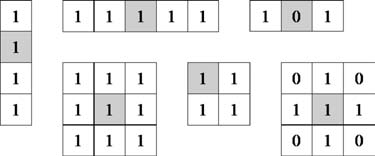



*  Structuring elements have a designated **centre pixel**.
*  This is located at the **true centre pixel** when both dimensions are *odd* (e.g. in 3x3 or 5x5 structuring elements).
*   When either dimension is *even*, the **centre pixel** is chosen to be that pixel north, north-west
or west (i.e. above and/or to the left) of the geometric centre (thus, a 4x3, 3x4 and a 4x4 structuring element would all have centre pixels at location [2,2]).



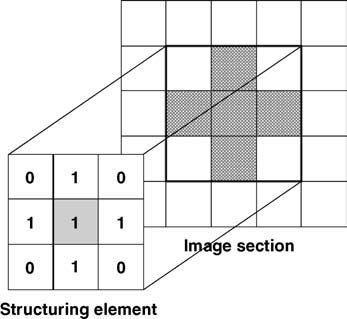

The local *neighbourhood* defined by a structuring element. This is given by those **shaded
pixels** in the image which lie beneath the pixels of value **1** in the structuring element.

* **Important:** Choose a good structuring element.!!!

## Dilation and erosion

We denote a general image by $A$ and an arbitrary structuring element by $B$ and speak of the erosion/dilation of $A$ by $B$.

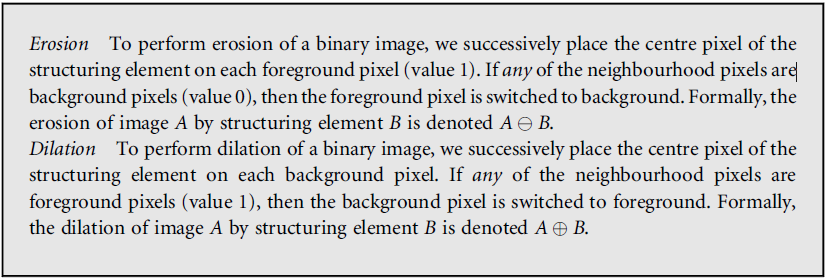


*   The *structuring element* **slides over the image** so that its centre pixel successively lies on top of each foreground or background pixel as appropriate.
* The new value of each image pixel then **depends** on the values of the pixels in the *neighbourhood* defined by the *structuring element*.



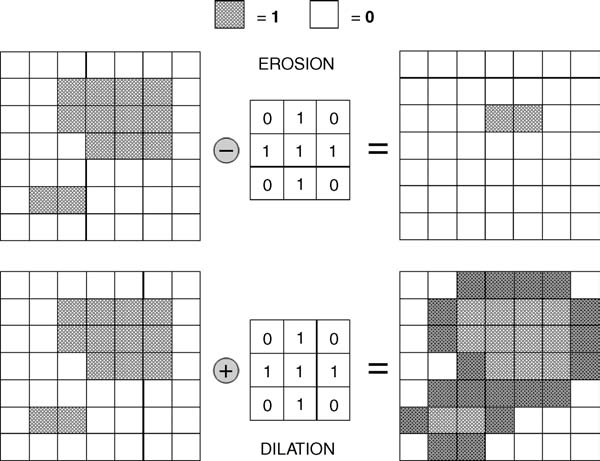

**Ejercicio:** Implementar las operaciones morfológicas  de erosión y dilatación como funciones de python con argumentos de entrada: el arreglo (imágen) y la estructura. (Comparar los resultados con las funciones pre-determinadas de *scipy.ndimage.morphology*)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt   

Text(0.5, 1.0, 'Erosión')

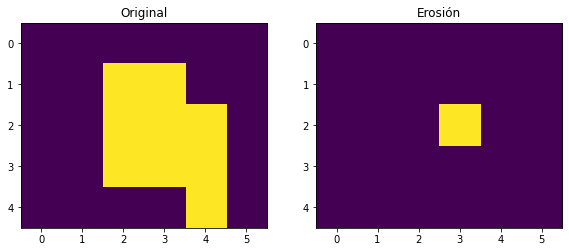

In [ ]:
# Code erosion here.
def contar_forma(imagen,kernel,pos):
  trozo=imagen[pos[0]-1:pos[0]+2 , pos[1]-1:pos[1]+2]
  return np.sum(trozo*kernel)
  
def erosion(imagen,estructurante):      #LA IMAGEN DEBE SER BINARIA  
  output=np.zeros_like(imagen)
  a=imagen.shape[0]
  b=imagen.shape[1]
  imagen_padd=np.zeros(( a+2 , b+2 ))    #MARCO DE CEROS
  imagen_padd[1:a+1,1:b+1]=imagen
  for x in range(1,a+1):
    for y in range(1,b+1):        
      if contar_forma(imagen_padd , estructurante , (x,y))==np.sum(estructurante):
        output[x-1,y-1]=1       
  return output

def bordes_erosion(A,B):  
  return A-erosion(A,B)

img=np.array([(0,0,0,0,0,0),
              (0,0,1,1,0,0),
              (0,0,1,1,1,0),
              (0,0,1,1,1,0),
              (0,0,0,0,1,0)])

B=np.array([(0,1,0),
            (1,1,1),
            (0,1,0)])

e=erosion(img,B)

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(img)
plt.title('Original')



plt.subplot(132)
plt.imshow(e)
plt.title('Erosión')

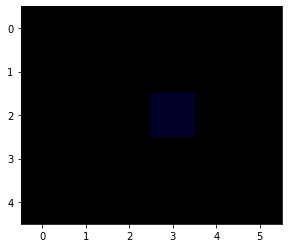

In [ ]:
import scipy
from PIL import Image
from matplotlib import cm
import scipy.ndimage

a = np.zeros((7,7), dtype=np.int)
a[1:6, 2:5] = 1
a = np.array([(0,0,0,0,0,0),
              (0,0,1,1,0,0),
              (0,0,1,1,1,0),
              (0,0,1,1,1,0),
              (0,0,0,0,1,0)])
b1 = scipy.ndimage.binary_erosion(a).astype(a.dtype) 
 
imm = Image.fromarray(np.uint8(cm.gist_earth(b1)*255))
imm.save('qq11.png','png')
I21= Image.open("qq11.png")
plt.imshow(I21)

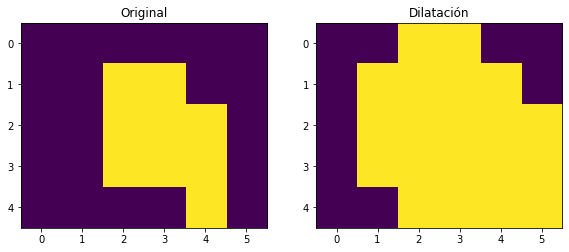

In [ ]:
# Code dilation here.
def contar_forma(imagen,kernel,pos):
  trozo=imagen[pos[0]-1:pos[0]+2 , pos[1]-1:pos[1]+2]
  return np.sum(trozo*kernel)
  
def dilatacion(imagen,estructurante):      #LA IMAGEN DEBE SER BINARIA  
  output=np.zeros_like(imagen)
  a=imagen.shape[0]
  b=imagen.shape[1]
  imagen_padd=np.zeros(( a+2 , b+2 ))   #MARCO DE CEROS
  imagen_padd[1:a+1,1:b+1]=imagen
  for x in range(1,a+1):
    for y in range(1,b+1):        
      if contar_forma(imagen_padd , estructurante , (x,y))>=1:
        output[x-1,y-1]=1


  return output

def bordes_dilatacion(A,B):  
  return dilatacion(A,B)-A

  img=np.array([(0,0,0,0,0,0),
              (0,0,1,1,0,0),
              (0,0,1,1,1,0),
              (0,0,1,1,1,0),
              (0,0,0,0,1,0)])

B=np.array([(0,1,0),
            (1,1,1),
            (0,1,0)])

d=dilatacion(img,B)

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(img)
plt.title('Original')

plt.subplot(132)
plt.imshow(d)
plt.title('Dilatación')


plt.show()

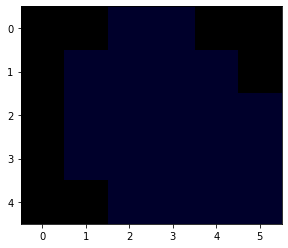

In [ ]:
import scipy
from PIL import Image
from matplotlib import cm
from google.colab.patches import cv2_imshow

a = np.zeros((7,7), dtype=np.int)
a[1:6, 2:5] = 1
a = np.array([(0,0,0,0,0,0),
              (0,0,1,1,0,0),
              (0,0,1,1,1,0),
              (0,0,1,1,1,0),
              (0,0,0,0,1,0)])
b = scipy.ndimage.binary_dilation(a).astype(a.dtype) 
 
im = Image.fromarray(np.uint8(cm.gist_earth(b)*255))
im.save('qq1.png','png')
I2= Image.open("qq1.png")
plt.imshow(I2)

## Effects and uses of erosion and dilation



*   **Erosion** has the effect of removing small isolated features, of breaking apart thin, joining regions in a feature and of reducing the size of solid objects by "eroding" them at the boundaries.
*   **Dilation** has an approximately reverse effect, broadening and thickening narrow regions and growing the feature around its edges.



*We cannot restore by dilation an object which has previously been completely removed by erosion*.

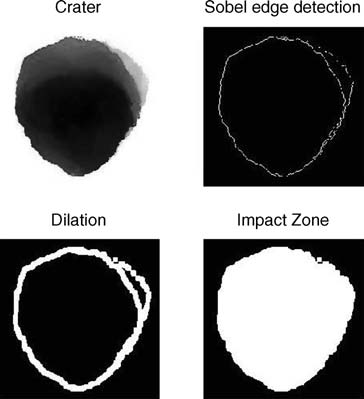

**Illustrating a simple use of dilation to join small breaks in a defining contour (image
courtesy of C.J. Solomon, M. Seeger, L. Kay and J. Curtis, ‘Automated compact parametric representation
of impact craters’ Int. J. Impact Eng., vol. 21, no. 10, 895–904 (1998))**

We can achieve this task in three simple steps.
1. Dilate the edge map until the contour is closed.
2. Fill in the background pixels enclosed by the contour. This is achieved by a related
morphological method called **region filling**.
3. Erode the image (the same number of times as we originally dilated) to maintain the
overall size of the delineated region.

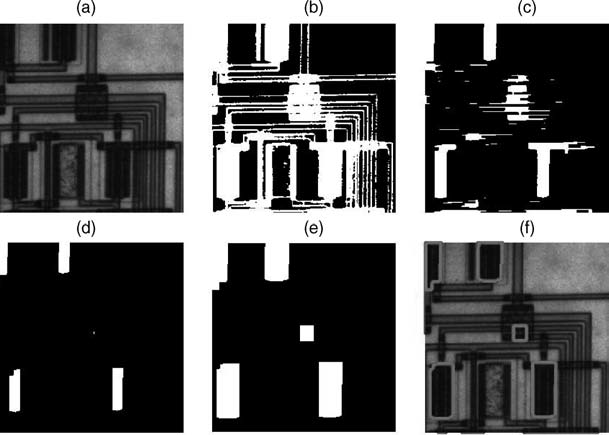

**Using dilation and erosion to identify features based on shape: (a) original; (b) result
after thresholding; (c) After erosion with horizontal line. (d) after erosion with vertical line;
(e) after dilation with same vertical and horizontal lines; (f) boundary of remaining objects superimposed
on original.**

## Morphological opening and closing

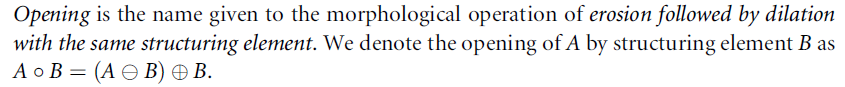

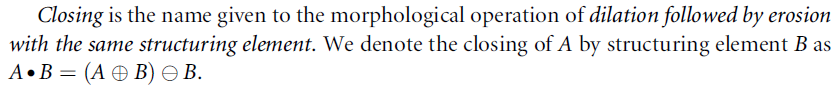

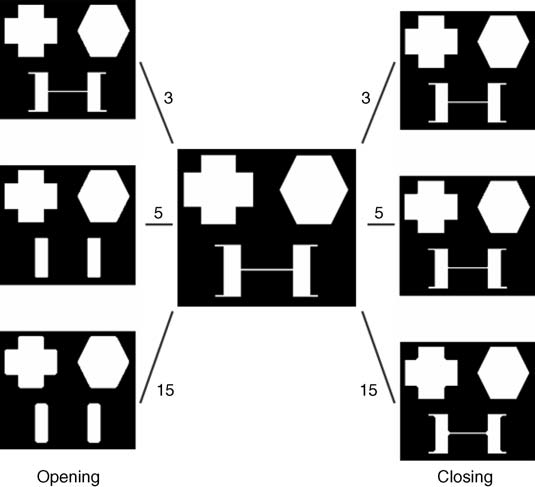

**Illustrating the effects of opening and closing upon some example shapes. The original
image shown in the centre was opened using disk-shaped structuring elements of radio 3, 5 and 15
pixels, producing the images to the left. The images to the right were similarly produced by closing the
image using the same structuring elements. The differences become more pronounced the larger the
structuring element employed.**

**Ejercicio:** Realizar las operaciones de *open* y *close* usando las funciones implementadas previamente. (Comparar resultados usando las herramientas de *Scipy* toolbox)

In [ ]:
# Code here. 

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"14MQrPQGNfiXyDba0x_rJKNAVcaVHaMPN"})   # replace the id with id of file you want to access
downloaded.GetContentFile('ejemplo.jpg')

In [ ]:
import cv2
import os
from matplotlib.image import imread
from PIL import Image
import numpy as np

Text(0.5, 1.0, 'closing')

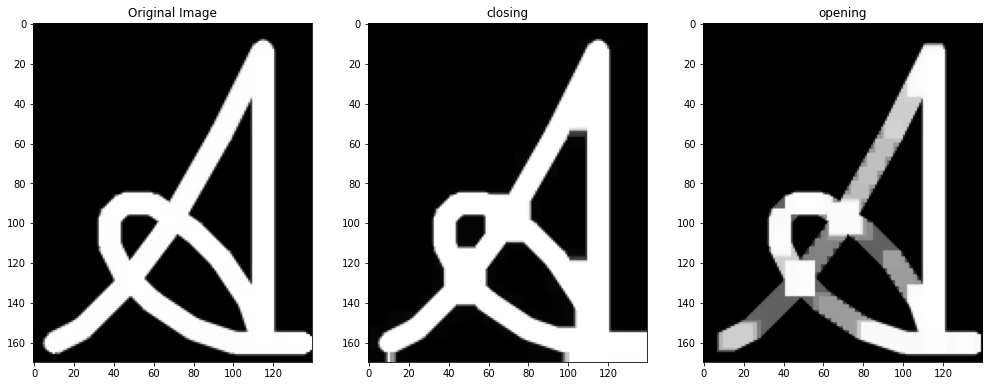

In [ ]:
kernel = np.ones((9,9),np.uint8)
image = imread(os.path.join("ejemplo.jpg"))

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1, 3, figsize=(17, 10))

ax[0].imshow(image)
ax[2].imshow(opening)
ax[1].imshow(closing)

ax[0].set_title("Original Image")
ax[2].set_title("opening")
ax[1].set_title("closing")


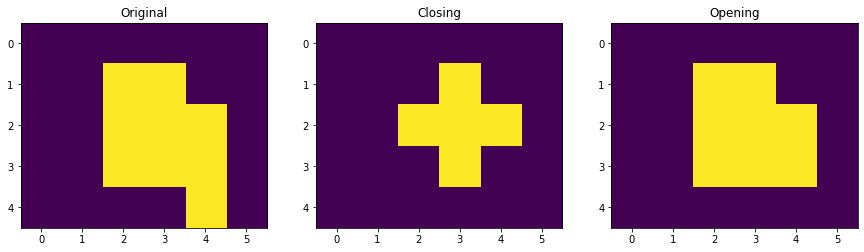

In [ ]:
import numpy as np
import numpy

def contar_forma(imagen,kernel,pos):
  trozo=imagen[pos[0]-1:pos[0]+2 , pos[1]-1:pos[1]+2]
  return np.sum(trozo*kernel)


img=np.array([(0,0,0,0,0,0),
              (0,0,1,1,0,0),
              (0,0,1,1,1,0),
              (0,0,1,1,1,0),
              (0,0,0,0,1,0)])



B=np.array([(0,1,0),
            (1,1,1),
            (0,1,0)])

def erosion(imagen,estructurante):      #LA IMAGEN DEBE SER BINARIA  
  output=np.zeros_like(imagen)
  a=imagen.shape[0]
  b=imagen.shape[1]
  imagen_padd=np.zeros(( a+2 , b+2 ))    #MARCO DE CEROS
  imagen_padd[1:a+1,1:b+1]=imagen
  for x in range(1,a+1):
    for y in range(1,b+1):        
      if contar_forma(imagen_padd , estructurante , (x,y))==np.sum(estructurante):
        output[x-1,y-1]=1       
  return output

def dilatacion(imagen,estructurante):      #LA IMAGEN DEBE SER BINARIA  
  output=np.zeros_like(imagen)
  a=imagen.shape[0]
  b=imagen.shape[1]
  imagen_padd=np.zeros(( a+2 , b+2 ))   #MARCO DE CEROS
  imagen_padd[1:a+1,1:b+1]=imagen
  for x in range(1,a+1):
    for y in range(1,b+1):        
      if contar_forma(imagen_padd , estructurante , (x,y))>=1:
        output[x-1,y-1]=1
  return output

def Closing(imagen,estructurante): #Dilatacion/Erosion 
  a = erosion(imagen,estructurante)
  b = dilatacion(a,estructurante)
  return b

def Opening(imagen,estructurante): #Erosion/Dilatacion
  a = dilatacion(imagen,estructurante)
  b = erosion(a,estructurante)
  return b

clou = Closing(img,B)
open = Opening(img,B)

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(img)
plt.title('Original')

plt.subplot(132)
plt.imshow(clou)
plt.title('Closing')

plt.subplot(133)
plt.imshow(open)
plt.title('Opening')

plt.show()

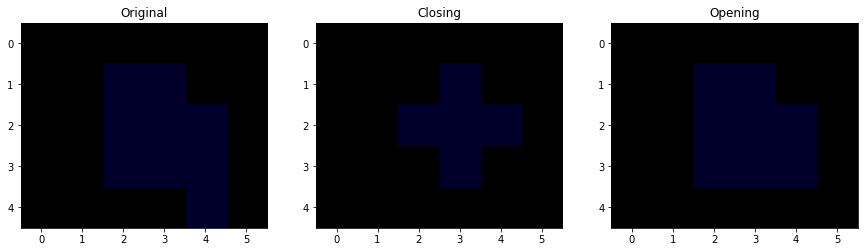

In [ ]:
from PIL import Image
from matplotlib import cm
import numpy as np
import scipy.ndimage
from scipy import ndimage

a = np.zeros((5,5), dtype=np.int)
a[1:-1, 1:-1] = 1; a[2,2] = 0

a = np.array([(0,0,0,0,0,0),
              (0,0,1,1,0,0),
              (0,0,1,1,1,0),
              (0,0,1,1,1,0),
              (0,0,0,0,1,0)])

im = Image.fromarray(np.uint8(cm.gist_earth(a)*255))
im.save('or.png','png')
I= Image.open("or.png")

#-----------------opening-----------------

b = ndimage.binary_opening(a).astype(np.int)
im = Image.fromarray(np.uint8(cm.gist_earth(b)*255))
im.save('mm1.png','png')
I1= Image.open("mm1.png")

#-----------------closing-----------------

c = ndimage.binary_closing(a).astype(np.int)
im = Image.fromarray(np.uint8(cm.gist_earth(c)*255))
im.save('mm2.png','png')
I2= Image.open("mm2.png")

#-------------------ploteo----------------


plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(I)
plt.title('Original')

plt.subplot(132)
plt.imshow(I1)
plt.title('Closing')

plt.subplot(133)
plt.imshow(I2)
plt.title('Opening')

plt.show()

## Boundary extraction

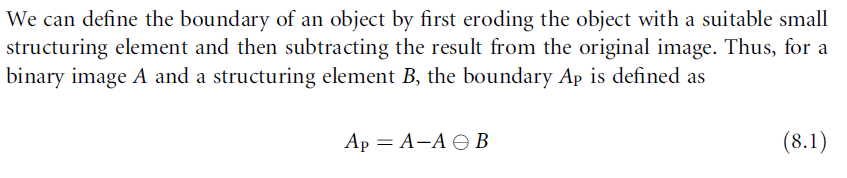

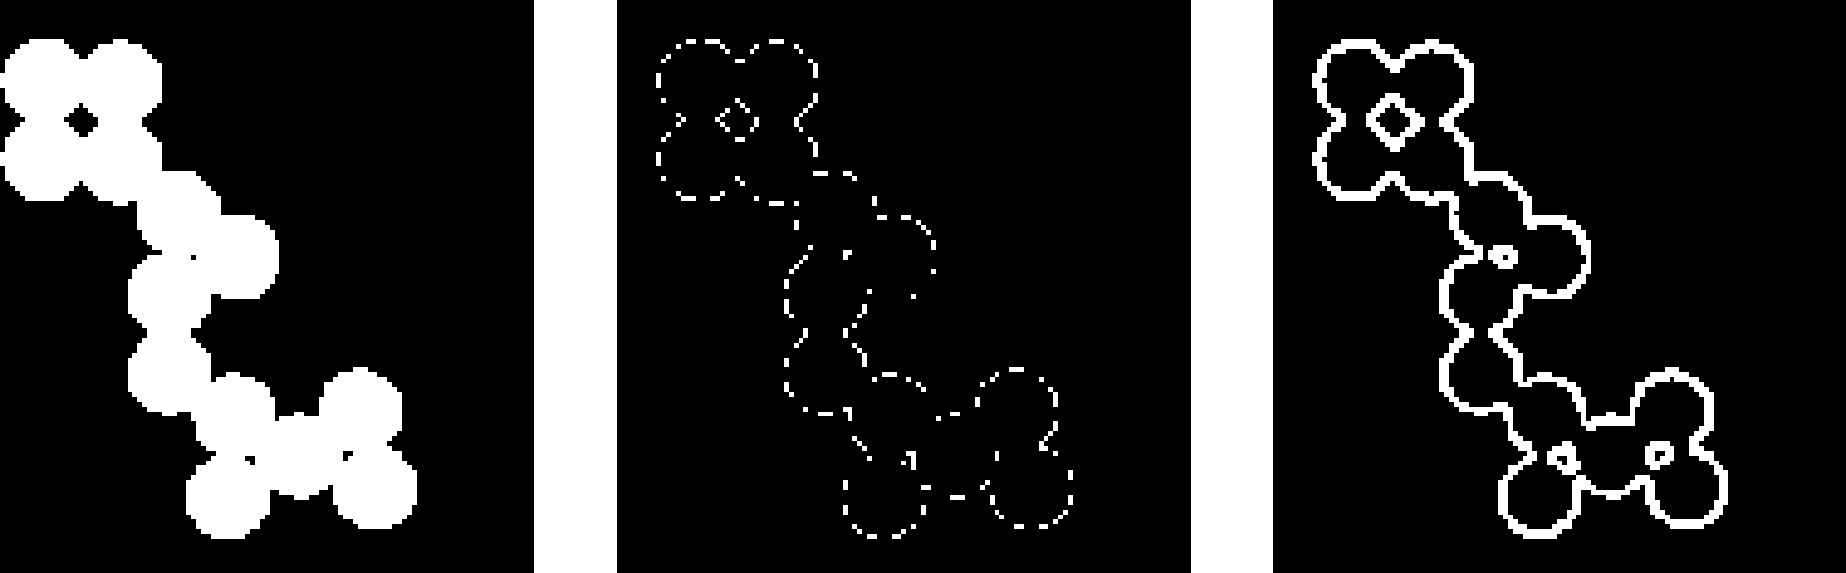

**Boundary extraction. Left: original.; centre: single-pixel boundary; right: thick
boundary extracted through use of larger structuring element**

**Ejercicio**: Realizar la tarea de *Boundary extraction* para una imagen binaria usando las funciones implementadas previamente.

In [ ]:
# Code here.

In [ ]:
downloaded = drive.CreateFile({'id':"1ItSWKySYLok9Tgg_YQxauZmIoh9ooQBU"})   # replace the id with id of file you want to access
downloaded.GetContentFile('233.jpg')

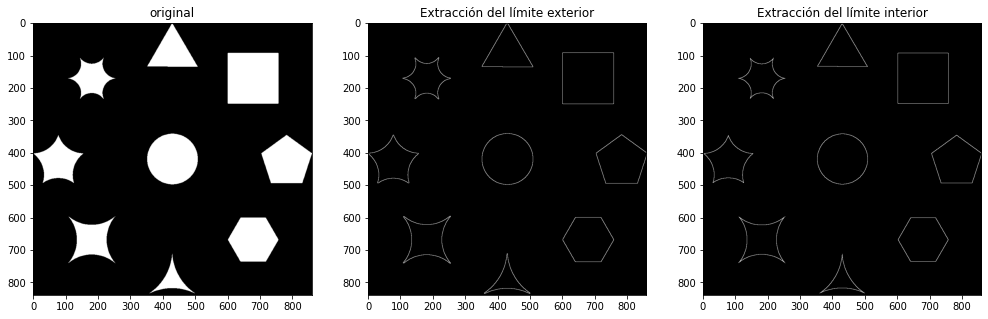

In [ ]:
import cv2
import numpy as np
from matplotlib.image import imread
import os
from google.colab.patches import cv2_imshow

I = imread(os.path.join("233.jpg"))
ret,img = cv2.threshold(I,127,255,cv2.THRESH_BINARY_INV)
#m,n =img.shape

kernel = np.ones((3,3),np.uint8)
r=cv2.erode(img,kernel,iterations=1)

d = cv2.dilate(img,kernel,iterations=1)

#Edge extraction
f=d-img
#Edge extraction
e=img-r

fig, ax = plt.subplots(1, 3, figsize=(17, 5))
ax[0].imshow(img)
ax[1].imshow(f)
ax[2].imshow(e)

ax[0].set_title("original")
ax[1].set_title("Extracción del límite exterior")
ax[2].set_title("Extracción del límite interior")
plt.show()

## The hit-or-miss transformation

*   The **hit-or-miss transform** indicates the *positions* where a certain *pattern* (characterized by
a structuring element B) occurs in the input image. 
* As such, it operates as a basic tool for **shape detection**.



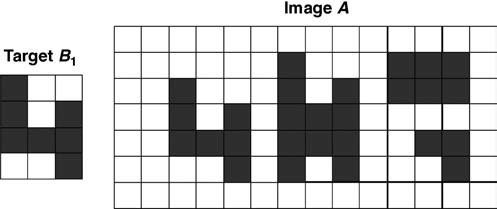

**The hit-or-miss transformation. The aim is to identify those locations within an image
(right) at which the specified target configuration of pixels or target shape (left) occurs.**

*   It is important to stress that we are seeking the **correct combination** of both foreground (shaded) and background (white) pixels --> (TARGET SHAPE)
*   Apply **erosion** operator (will preserve all those pixels in image A at which the foreground pixels of the
target B1 can be entirely contained within foreground pixels)



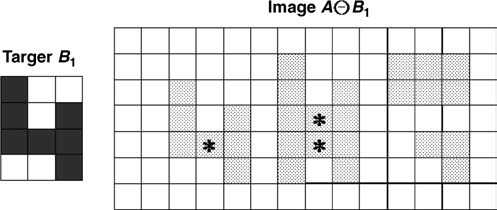

**The hit-or-miss transformation. The first step is erosion of the image by the target
configuration. This produces the hits denoted by asterisks**

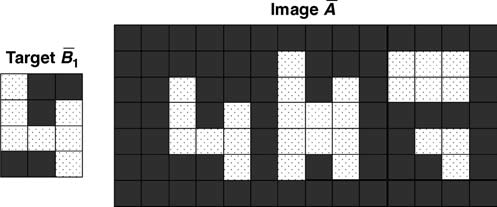

**The hit-or-miss transformation. For the second step where we locate the misses, we
consider the complement of the image A and the complement of the target shape B2=B1**



*   Apply **erosion** operator (this erosion will preserve all those pixels at which the foreground pixels of the target complement B2 can be entirely contained within
the foreground pixels of the image complement A).





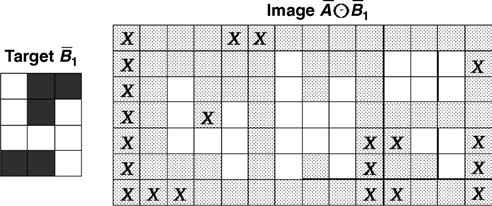

**The hit-or-miss transformation. The second step consists of eroding the complement of
the image A by the complement of the target shape B2. This produces the misses denoted here
by crosses**

Accordingly, the third and final step in the process is to take a logical intersection (AND) of the two images.
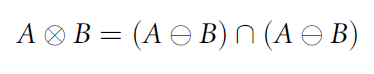

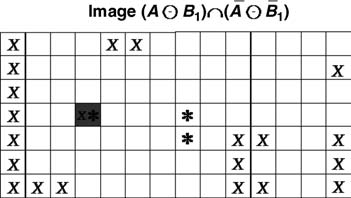

**The hit-or-miss transformation. The final step takes the intersection (logical AND) of
the two eroded images. Any surviving pixels give the location of the target shape in
the original image A**

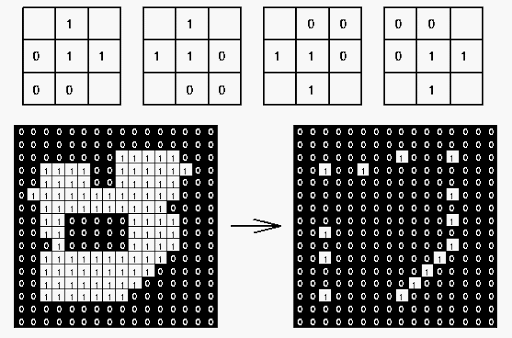

**Ejercicio:** Implementar el ejemplo de *hit-or-miss transformation* usando las funciones previamente diseñadas.

In [ ]:
# Code here.

Text(0.5, 1.0, 'Original')

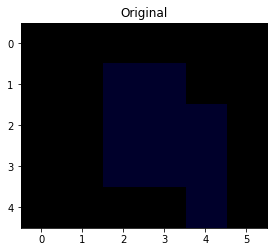

In [ ]:
im = Image.fromarray(np.uint8(cm.gist_earth(a)*255))
im.save('or.png','png')
I= Image.open("or.png")

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(I)
plt.title('Original')

Text(0.5, 1.0, 'output_image')

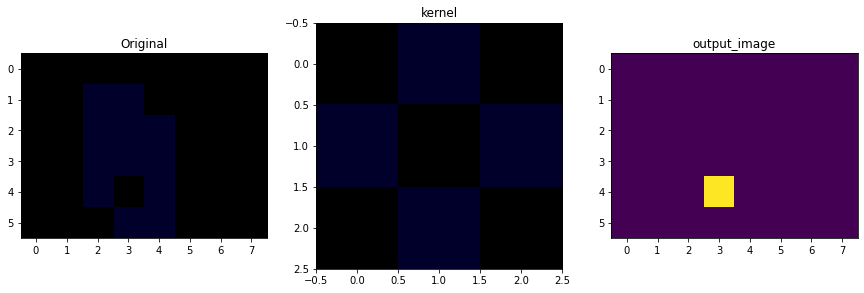

In [ ]:
import cv2
import os
from matplotlib.image import imread
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

# Create the input image
input_image = np.array(
    [(0,0,0,0,0,0,0,0),
     (0,0,1,1,0,0,0,0),
     (0,0,1,1,1,0,0,0),
     (0,0,1,1,1,0,0,0),
     (0,0,1,0,1,0,0,0),
     (0,0,0,1,1,0,0,0)], dtype="uint8")

kernel = np.array( 
      [ (0,1,0),
        (1,-1,1),
        (0,1,0)], dtype="int")

output_image = cv2.morphologyEx(input_image,cv2.MORPH_HITMISS,kernel)

im = Image.fromarray(np.uint8(cm.gist_earth(input_image)*255))
im.save('or.png','png')
I= Image.open("or.png")

ker = Image.fromarray(np.uint8(cm.gist_earth(kernel)*255))
ker.save('or.png','png')
I1= Image.open("or.png")

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(I)
plt.title('Original')

plt.subplot(132)
plt.imshow(I1)
plt.title('kernel')

plt.subplot(133)
plt.imshow(output_image)
plt.title('output_image')